In [5]:
import community as community_louvain
import igraph as ig
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import networkx as nx

from networkx.algorithms import community as communitydetect
import re 

In [2]:
# final kmatrix
with open('../v2/final_kernel_matrix/complete_kernel_matrix_v2.pkl', 'rb') as f:
    kmatrix = pickle.load(f)

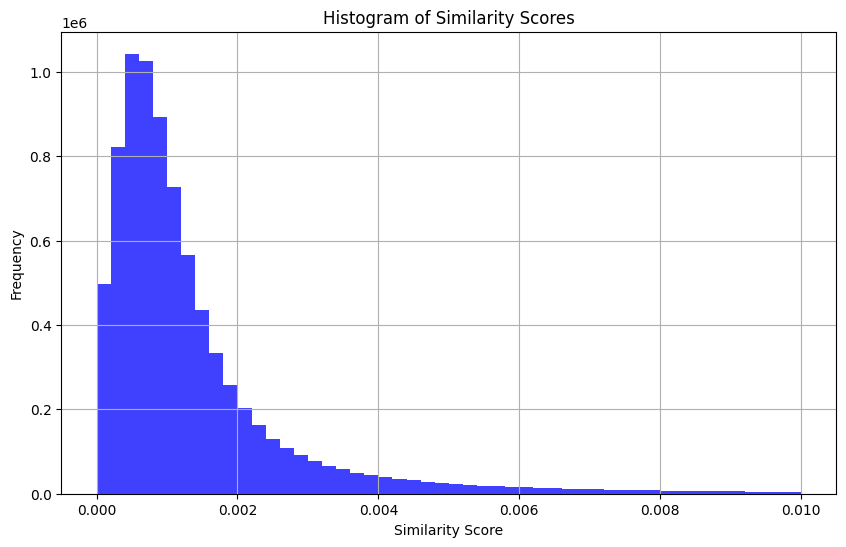

In [3]:
similarity_matrix = np.array(kmatrix)
similarity_matrix = (similarity_matrix + similarity_matrix.T) / 2

np.fill_diagonal(similarity_matrix, 0) # Remove self-similarities

# Flatten the matrix and remove zero values (self-similarities already removed)
similarity_scores = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]

plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=50, alpha=0.75, color='blue', range=(0, 0.01))
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [1]:
with open('./aux/inflection_points.pkl', 'rb') as f:
    inflection_points = pickle.load(f)

In [4]:

list_of_files = glob.glob('../v2/graphs/*/*.graphml')
# Files with no nodes to be removed
files_with_no_nodes = [
    '../v2/graphs/Technology/learnmachinelearning.json.graphml',
    '../v2/graphs/Technology/DataHoarder.json.graphml',
    '../v2/graphs/Technology/talesfromtechsupport.json.graphml',
    '../v2/graphs/Technology/technews.json.graphml',
    '../v2/graphs/Technology/apolloapp.json.graphml',
    '../v2/graphs/Technology/ipad.json.graphml',
    '../v2/graphs/Technology/onions.json.graphml',
    '../v2/graphs/Technology/Windows10.json.graphml',
    '../v2/graphs/Art/AnalogCommunity.json.graphml',
    '../v2/graphs/Art/iWallpaper.json.graphml',
    '../v2/graphs/Art/ImaginaryHorrors.json.graphml',
    '../v2/graphs/Art/pic.json.graphml',
    '../v2/graphs/Art/ArtHistory.json.graphml',
    '../v2/graphs/Art/80s.json.graphml',
    '../v2/graphs/Art/Pyrography.json.graphml',
    '../v2/graphs/Art/blenderhelp.json.graphml',
    '../v2/graphs/Art/MobileWallpaper.json.graphml',
    '../v2/graphs/Art/wallpaperengine.json.graphml'
]

# Remove files with no nodes
list_of_files = [file for file in list_of_files if file not in files_with_no_nodes]

In [5]:
print(len(list_of_files))

4032


In [6]:
inflection_points

array([2.00200200e-05, 1.46146146e-03, 3.61361361e-03, 4.19419419e-03,
       4.82482482e-03, 5.20520521e-03, 5.49549550e-03, 5.99599600e-03,
       6.66666667e-03, 7.41741742e-03, 7.78778779e-03, 8.12812813e-03,
       8.55855856e-03, 9.21921922e-03, 9.65965966e-03, 4.80480480e-04,
       3.51351351e-03, 4.02402402e-03, 4.45445445e-03, 5.04504505e-03,
       5.33533534e-03, 5.73573574e-03, 6.28628629e-03, 7.17717718e-03,
       7.58758759e-03, 8.00800801e-03, 8.30830831e-03, 8.94894895e-03,
       9.42942943e-03, 9.89989990e-03, 4.76995214e-03, 4.00000000e-03])

In [8]:
inflection_points

[0.0036136136136136134,
 0.004194194194194194,
 0.004824824824824825,
 0.005205205205205205,
 0.005495495495495496,
 0.005995995995995996,
 0.006666666666666666,
 0.007417417417417417,
 0.007787787787787787,
 0.008128128128128128,
 0.008558558558558558,
 0.009219219219219218,
 0.00965965965965966,
 0.0035135135135135136,
 0.004024024024024024,
 0.004454454454454454,
 0.005045045045045045,
 0.005335335335335335,
 0.005735735735735736,
 0.006286286286286286,
 0.007177177177177177,
 0.007587587587587588,
 0.008008008008008008,
 0.008308308308308308,
 0.008948948948948949,
 0.009429429429429429,
 0.0098998998998999,
 0.00476995213776347,
 0.004]

In [9]:
def name_processing(name):
    aux = name.split("/")
    return aux[-2] + "/" , aux[-1].split(".")[0]

graphs = {}
for threshold in inflection_points:
    print(f"Processing threshold: {threshold}")
    G = nx.Graph()

    for graph in list_of_files:
        topic, subreddit = name_processing(graph)
        G.add_node(graph)
        G.nodes[graph]['topic'] = topic
        G.nodes[graph]['subreddit'] = subreddit

    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):
            if similarity_matrix[i][j] > threshold:
                G.add_edge(list_of_files[i], list_of_files[j], weight=similarity_matrix[i][j])

    graphs[threshold] = G


Processing threshold: 0.0036136136136136134
Processing threshold: 0.004194194194194194
Processing threshold: 0.004824824824824825
Processing threshold: 0.005205205205205205
Processing threshold: 0.005495495495495496
Processing threshold: 0.005995995995995996
Processing threshold: 0.006666666666666666
Processing threshold: 0.007417417417417417
Processing threshold: 0.007787787787787787
Processing threshold: 0.008128128128128128
Processing threshold: 0.008558558558558558
Processing threshold: 0.009219219219219218
Processing threshold: 0.00965965965965966
Processing threshold: 0.0035135135135135136
Processing threshold: 0.004024024024024024
Processing threshold: 0.004454454454454454
Processing threshold: 0.005045045045045045
Processing threshold: 0.005335335335335335
Processing threshold: 0.005735735735735736
Processing threshold: 0.006286286286286286
Processing threshold: 0.007177177177177177
Processing threshold: 0.007587587587587588
Processing threshold: 0.008008008008008008
Processing

In [12]:
# do a sanity check on whether all graph nodes attributes are non -empty
for threshold, G in graphs.items():
    for node in G.nodes:
        if G.nodes[node] == {}:
            print(f"Empty node found in graph with threshold {threshold}")
            break
    print(f"Graph with threshold {threshold} is ok")

Graph with threshold 0.0036136136136136134 is ok
Graph with threshold 0.004194194194194194 is ok
Graph with threshold 0.004824824824824825 is ok
Graph with threshold 0.005205205205205205 is ok
Graph with threshold 0.005495495495495496 is ok
Graph with threshold 0.005995995995995996 is ok
Graph with threshold 0.006666666666666666 is ok
Graph with threshold 0.007417417417417417 is ok
Graph with threshold 0.007787787787787787 is ok
Graph with threshold 0.008128128128128128 is ok
Graph with threshold 0.008558558558558558 is ok
Graph with threshold 0.009219219219219218 is ok
Graph with threshold 0.00965965965965966 is ok
Graph with threshold 0.0035135135135135136 is ok
Graph with threshold 0.004024024024024024 is ok
Graph with threshold 0.004454454454454454 is ok
Graph with threshold 0.005045045045045045 is ok
Graph with threshold 0.005335335335335335 is ok
Graph with threshold 0.005735735735735736 is ok
Graph with threshold 0.006286286286286286 is ok
Graph with threshold 0.0071771771771771

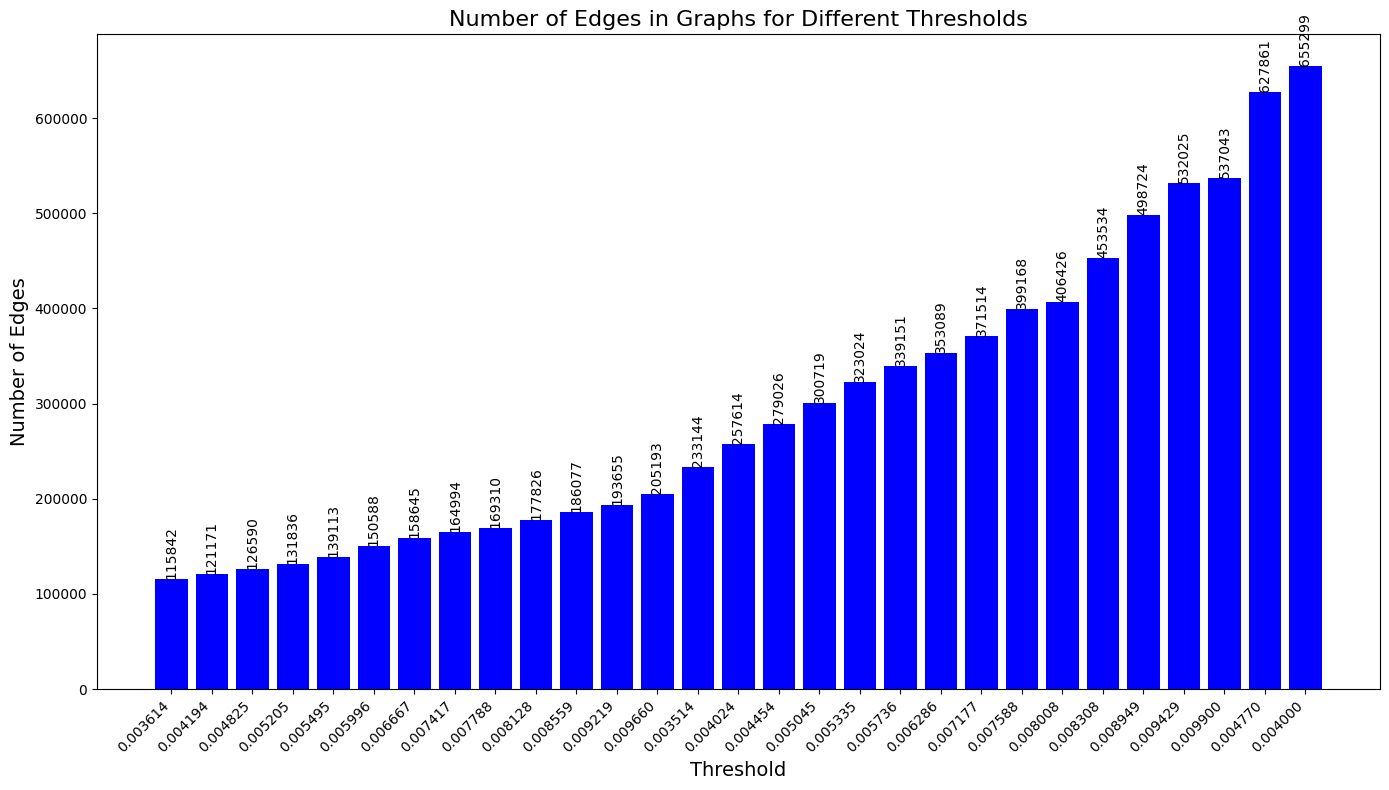

In [17]:
# inflection_test_points = np.array([0.01281198, 0.01119356, 0.01498934, 0.01607281, 0.01590291, 0.01804706])

all_points = inflection_points

# Calculate the number of edges for each graph
edge_counts = sorted([len(graphs[threshold].edges) for threshold in all_points])

# Determine colors for each threshold point
colors = ['blue' if threshold in inflection_points else 'red' for threshold in all_points]

# Create a new figure with a larger size
plt.figure(figsize=(14, 8))

# Plot the bar chart
bars = plt.bar(range(len(all_points)), edge_counts, color=colors)

# Add text labels to each bar for better visibility
for bar, count in zip(bars, edge_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', 
             ha='center', va='bottom', fontsize=10, color='black', rotation=90)

# Set the x-ticks and rotate them for better readability
plt.xticks(range(len(all_points)), [f"{point:.6f}" for point in all_points], rotation=45, ha='right', fontsize=10)

# Add labels and title with increased font size
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Number of Edges', fontsize=14)
plt.title('Number of Edges in Graphs for Different Thresholds', fontsize=16)

# Adjust the margins to prevent the x-tick labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
graphs

{0.0036136136136136134: <networkx.classes.graph.Graph at 0x1238751f0>,
 0.004194194194194194: <networkx.classes.graph.Graph at 0x121e9e540>,
 0.004824824824824825: <networkx.classes.graph.Graph at 0x123910f80>,
 0.005205205205205205: <networkx.classes.graph.Graph at 0x123826ed0>,
 0.005495495495495496: <networkx.classes.graph.Graph at 0x3232b3080>,
 0.005995995995995996: <networkx.classes.graph.Graph at 0x329996270>,
 0.006666666666666666: <networkx.classes.graph.Graph at 0x3232b2fc0>,
 0.007417417417417417: <networkx.classes.graph.Graph at 0x32efaf8c0>,
 0.007787787787787787: <networkx.classes.graph.Graph at 0x3346d9e20>,
 0.008128128128128128: <networkx.classes.graph.Graph at 0x33da7e780>,
 0.008558558558558558: <networkx.classes.graph.Graph at 0x33da7e690>,
 0.009219219219219218: <networkx.classes.graph.Graph at 0x11175f4a0>,
 0.00965965965965966: <networkx.classes.graph.Graph at 0x34360f050>,
 0.0035135135135135136: <networkx.classes.graph.Graph at 0x3496a7950>,
 0.0040240240240240

In [18]:
true_categories = {
    list_of_files[i].split("/")[-1].split(".")[0] : list_of_files[i].split("/")[-2] for i in range(len(list_of_files))
}
true_categories

{'teenagersbuthot': 'Internet Culture and Memes',
 'AsbestosRemovalMemes': 'Internet Culture and Memes',
 'sadlygokarts': 'Internet Culture and Memes',
 'peopleofwalmart': 'Internet Culture and Memes',
 'ani_bm': 'Internet Culture and Memes',
 'memesopdidnotlike': 'Internet Culture and Memes',
 'LTB_iel': 'Internet Culture and Memes',
 'MAAU': 'Internet Culture and Memes',
 'oddlymesmerizing': 'Internet Culture and Memes',
 'schizoposters': 'Internet Culture and Memes',
 'okbuddyphd': 'Internet Culture and Memes',
 'FindTheSniper': 'Internet Culture and Memes',
 'AllThatIsInteresting': 'Internet Culture and Memes',
 'VeryExpensive': 'Internet Culture and Memes',
 'whereintheworld': 'Internet Culture and Memes',
 'antimeme': 'Internet Culture and Memes',
 'Indiangirlsontinder': 'Internet Culture and Memes',
 'BLAHAJ': 'Internet Culture and Memes',
 'Daniellarson': 'Internet Culture and Memes',
 'evilbuildings': 'Internet Culture and Memes',
 'xkcd': 'Internet Culture and Memes',
 'ThatP

In [22]:
def community_detection_louvain(G):
    partition = community_louvain.best_partition(G)
    sorted_partition = sorted(partition.items(), key=lambda kv: kv[1])
    partition_dict = {}
    for k, v in sorted_partition:
        if v not in partition_dict:
            partition_dict[v] = []
        partition_dict[v].append(k)
    
    return partition_dict 
def community_detection_girvan_newman(G):
    communities_generator = communitydetect.girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    sorted(map(sorted, next_level_communities))
    partition_dict = {}
    for i, community in enumerate(next_level_communities):
        for node in community:
            if i not in partition_dict:
                partition_dict[i] = []
            partition_dict[i].append(node)
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    
    return partition_dict


In [23]:
def community_detection_label_propagation(G):
    communities = nx.algorithms.community.label_propagation.label_propagation_communities(G)
    communities_list = list(communities)
    partition_dict = {}
    for i, community in enumerate(communities_list):
        partition_dict[i] = list(community)
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k
    return partition_dict
def community_detection_fast_greedy(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_fastgreedy()
    clusters = communities.as_clustering()
    partition_dict = {}
    for i, community in enumerate(clusters):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k
    
    return partition_dict

In [24]:
def community_detection_leading_eigenvector(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_leading_eigenvector()
    partition_dict = {}
    for i, community in enumerate(communities):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    return partition_dict
def community_detection_walktrap(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_walktrap()
    clusters = communities.as_clustering()
    partition_dict = {}
    for i, community in enumerate(clusters):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k
    
    return partition_dict

In [25]:
def remove_outliers(partition_dict):
    temporary_partition_dict = partition_dict.copy()
    community_sizes = np.array([len(v) for v in partition_dict.values() if len(v) > 1])
    Q1 = np.percentile(community_sizes, 25)
    Q3 = np.percentile(community_sizes, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    partition_dict = {k: v for k, v in partition_dict.items() if len(v) >= lower_bound and len(v) <= upper_bound and len(v) > 1}
    return partition_dict, temporary_partition_dict
from collections import Counter

def get_homogeneity_scores(partition_dict):
    mean_homogeneity = 0
    median_homogeneity = 0
    homogeneity_scores = {}
    for community_id, subreddits in partition_dict.items():
        categories = [true_categories[subreddit.split("/")[-1].split(".")[0]] for subreddit in subreddits if subreddit.split("/")[-1].split(".")[0] in true_categories]
        category_counts = Counter(categories)
        if category_counts:
            most_common_category, most_common_count = category_counts.most_common(1)[0]
            homogeneity = most_common_count / len(categories)
        else:
            homogeneity = 0

        homogeneity_scores[community_id] = homogeneity

    mean_homogeneity = np.mean(list(homogeneity_scores.values()))
    median_homogeneity = np.median(list(homogeneity_scores.values()))
    return mean_homogeneity, median_homogeneity

In [2]:
community_detection_algorithms = ['louvain', 'girvan_newman', 'label_propagation', 'fast_greedy', 'leading_eigenvector', 'walktrap']
# community_detection_algorithms = ['girvan_newman']

In [27]:
def validate_partition(G, partition):
    """ Ensure every node is covered exactly once in the partition. """
    all_nodes = set(G.nodes())
    covered_nodes = set()
    for community in partition:
        if not community:  # Skip empty communities if any
            continue
        community_set = set(community)
        if not covered_nodes.isdisjoint(community_set):
            raise ValueError("Overlap detected in communities")
        covered_nodes.update(community_set)

    if covered_nodes != all_nodes:
        raise ValueError("Partition does not cover all nodes")

In [ ]:
import logging
from collections import defaultdict

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Define data structures for metrics
metrics = defaultdict(lambda: defaultdict(dict))

for algorithm in community_detection_algorithms:
    for threshold, G in graphs.items():
        logger.info(f"Processing algorithm: {algorithm}, threshold: {threshold}")
        try:
            # Community detection
            if algorithm == 'louvain':
                partition = community_detection_louvain(G)
            elif algorithm == 'girvan_newman':
                partition = community_detection_girvan_newman(G)
            elif algorithm == 'label_propagation':
                partition = community_detection_label_propagation(G)
            elif algorithm == 'fast_greedy':
                partition = community_detection_fast_greedy(G)
            elif algorithm == 'leading_eigenvector':
                partition = community_detection_leading_eigenvector(G)
            elif algorithm == 'walktrap':
                partition = community_detection_walktrap(G)
        except Exception as e:
            logger.error(f"Error in {algorithm} for threshold {threshold}: {e}")
            continue

        # Remove outliers
        partition, original = remove_outliers(partition)

        if len(partition) <= 1:
            logger.warning(f"Skipping {algorithm} for threshold {threshold}: partition has 1 or fewer communities")
            continue

        # Calculate existing metrics
        mean_homogeneity, median_homogeneity = get_homogeneity_scores(partition)
        modularity = communitydetect.modularity(G, [list(v) for v in original.values()])

        metrics[algorithm][threshold]["modularity"] = modularity
        metrics[algorithm][threshold]["mean_homogeneity"] = mean_homogeneity
        metrics[algorithm][threshold]["median_homogeneity"] = median_homogeneity

        logger.info(f"{algorithm} {threshold}: Modularity={modularity:.4f}, Conductance={metrics[algorithm][threshold]['conductance']:.4f}")

logger.info("Processing completed for all algorithms and thresholds.")


In [3]:
# Running all algorithms at once was causing MemoryError, so I ran one algorithm at a time and saved the results to a file "results.txt"
# Girvan Newman especially took very long. Notice the timestamps
# I'm using the results string to calculate the mean and median homogeneity scores for each algorithm and threshold

string = """
2024-07-06 20:10:44,329 - INFO - Processing algorithm: louvain, threshold: 2.002002002002002e-05
2024-07-06 20:16:36,968 - INFO - louvain 2.002002002002002e-05: Modularity=0.1498, Mean Homogeneity=0.4658, Median Homogeneity=0.3630
2024-07-06 20:16:36,984 - INFO - Processing algorithm: louvain, threshold: 0.0014614614614614613
2024-07-06 20:17:37,942 - INFO - louvain 0.0014614614614614613: Modularity=0.2145, Mean Homogeneity=0.4594, Median Homogeneity=0.4135
2024-07-06 20:17:37,954 - INFO - Processing algorithm: louvain, threshold: 0.0036136136136136134
2024-07-06 20:17:52,012 - INFO - louvain 0.0036136136136136134: Modularity=0.3245, Mean Homogeneity=0.6457, Median Homogeneity=0.7408
2024-07-06 20:17:52,019 - INFO - Processing algorithm: louvain, threshold: 0.004194194194194194
2024-07-06 20:18:02,364 - INFO - louvain 0.004194194194194194: Modularity=0.3420, Mean Homogeneity=0.5572, Median Homogeneity=0.5593
2024-07-06 20:18:02,367 - INFO - Processing algorithm: louvain, threshold: 0.004824824824824825
2024-07-06 20:18:11,483 - INFO - louvain 0.004824824824824825: Modularity=0.3657, Mean Homogeneity=0.6707, Median Homogeneity=0.7755
2024-07-06 20:18:11,484 - INFO - Processing algorithm: louvain, threshold: 0.005205205205205205
2024-07-06 20:18:33,693 - INFO - louvain 0.005205205205205205: Modularity=0.3815, Mean Homogeneity=0.5742, Median Homogeneity=0.5111
2024-07-06 20:18:33,696 - INFO - Processing algorithm: louvain, threshold: 0.005495495495495496
2024-07-06 20:18:39,243 - INFO - louvain 0.005495495495495496: Modularity=0.3908, Mean Homogeneity=0.7024, Median Homogeneity=0.7719
2024-07-06 20:18:39,243 - INFO - Processing algorithm: louvain, threshold: 0.005995995995995996
2024-07-06 20:18:44,489 - INFO - louvain 0.005995995995995996: Modularity=0.4063, Mean Homogeneity=0.7220, Median Homogeneity=0.7542
2024-07-06 20:18:44,489 - INFO - Processing algorithm: louvain, threshold: 0.006666666666666666
2024-07-06 20:18:47,815 - INFO - louvain 0.006666666666666666: Modularity=0.4275, Mean Homogeneity=0.7159, Median Homogeneity=0.7500
2024-07-06 20:18:47,816 - INFO - Processing algorithm: louvain, threshold: 0.007417417417417417
2024-07-06 20:18:50,559 - INFO - louvain 0.007417417417417417: Modularity=0.4486, Mean Homogeneity=0.6332, Median Homogeneity=0.5000
2024-07-06 20:18:50,560 - INFO - Processing algorithm: louvain, threshold: 0.007787787787787787
2024-07-06 20:18:53,238 - INFO - louvain 0.007787787787787787: Modularity=0.4592, Mean Homogeneity=0.6969, Median Homogeneity=0.7283
2024-07-06 20:18:53,239 - INFO - Processing algorithm: louvain, threshold: 0.008128128128128128
2024-07-06 20:18:56,461 - INFO - louvain 0.008128128128128128: Modularity=0.4677, Mean Homogeneity=0.7052, Median Homogeneity=0.6861
2024-07-06 20:18:56,462 - INFO - Processing algorithm: louvain, threshold: 0.008558558558558558
2024-07-06 20:18:59,048 - INFO - louvain 0.008558558558558558: Modularity=0.4816, Mean Homogeneity=0.6901, Median Homogeneity=0.6828
2024-07-06 20:18:59,049 - INFO - Processing algorithm: louvain, threshold: 0.009219219219219218
2024-07-06 20:19:01,314 - INFO - louvain 0.009219219219219218: Modularity=0.4935, Mean Homogeneity=0.7920, Median Homogeneity=0.9003
2024-07-06 20:19:01,314 - INFO - Processing algorithm: louvain, threshold: 0.00965965965965966
2024-07-06 20:19:03,180 - INFO - louvain 0.00965965965965966: Modularity=0.5029, Mean Homogeneity=0.7576, Median Homogeneity=0.8361
2024-07-06 20:19:03,180 - INFO - Processing algorithm: louvain, threshold: 0.00048048048048048047
2024-07-06 20:21:55,900 - INFO - louvain 0.00048048048048048047: Modularity=0.1579, Mean Homogeneity=0.4407, Median Homogeneity=0.3761
2024-07-06 20:21:55,918 - INFO - Processing algorithm: louvain, threshold: 0.0035135135135135136
2024-07-06 20:22:15,737 - INFO - louvain 0.0035135135135135136: Modularity=0.3182, Mean Homogeneity=0.5271, Median Homogeneity=0.4518
2024-07-06 20:22:15,739 - INFO - Processing algorithm: louvain, threshold: 0.004024024024024024
2024-07-06 20:22:26,597 - INFO - louvain 0.004024024024024024: Modularity=0.3364, Mean Homogeneity=0.4714, Median Homogeneity=0.3768
2024-07-06 20:22:26,600 - INFO - Processing algorithm: louvain, threshold: 0.004454454454454454
2024-07-06 20:22:32,380 - INFO - louvain 0.004454454454454454: Modularity=0.3560, Mean Homogeneity=0.6903, Median Homogeneity=0.7603
2024-07-06 20:22:32,383 - INFO - Processing algorithm: louvain, threshold: 0.005045045045045045
2024-07-06 20:22:39,475 - INFO - louvain 0.005045045045045045: Modularity=0.3736, Mean Homogeneity=0.7493, Median Homogeneity=0.8118
2024-07-06 20:22:39,477 - INFO - Processing algorithm: louvain, threshold: 0.005335335335335335
2024-07-06 20:22:45,288 - INFO - louvain 0.005335335335335335: Modularity=0.3861, Mean Homogeneity=0.6552, Median Homogeneity=0.7500
2024-07-06 20:22:45,288 - INFO - Processing algorithm: louvain, threshold: 0.005735735735735736
2024-07-06 20:22:50,785 - INFO - louvain 0.005735735735735736: Modularity=0.3982, Mean Homogeneity=0.6336, Median Homogeneity=0.7500
2024-07-06 20:22:50,787 - INFO - Processing algorithm: louvain, threshold: 0.006286286286286286
2024-07-06 20:23:08,807 - INFO - louvain 0.006286286286286286: Modularity=0.4130, Mean Homogeneity=0.6466, Median Homogeneity=0.5891
2024-07-06 20:23:08,808 - INFO - Processing algorithm: louvain, threshold: 0.007177177177177177
2024-07-06 20:23:12,963 - INFO - louvain 0.007177177177177177: Modularity=0.4414, Mean Homogeneity=0.6522, Median Homogeneity=0.5131
2024-07-06 20:23:12,964 - INFO - Processing algorithm: louvain, threshold: 0.007587587587587588
2024-07-06 20:23:15,695 - INFO - louvain 0.007587587587587588: Modularity=0.4562, Mean Homogeneity=0.6791, Median Homogeneity=0.7609
2024-07-06 20:23:15,696 - INFO - Processing algorithm: louvain, threshold: 0.008008008008008008
2024-07-06 20:23:18,168 - INFO - louvain 0.008008008008008008: Modularity=0.4679, Mean Homogeneity=0.6800, Median Homogeneity=0.7078
2024-07-06 20:23:18,168 - INFO - Processing algorithm: louvain, threshold: 0.008308308308308308
2024-07-06 20:23:20,663 - INFO - louvain 0.008308308308308308: Modularity=0.4725, Mean Homogeneity=0.7589, Median Homogeneity=0.7999
2024-07-06 20:23:20,663 - INFO - Processing algorithm: louvain, threshold: 0.008948948948948949
2024-07-06 20:23:23,357 - INFO - louvain 0.008948948948948949: Modularity=0.4909, Mean Homogeneity=0.7732, Median Homogeneity=0.8846
2024-07-06 20:23:23,357 - INFO - Processing algorithm: louvain, threshold: 0.009429429429429429
2024-07-06 20:23:25,153 - INFO - louvain 0.009429429429429429: Modularity=0.5025, Mean Homogeneity=0.7606, Median Homogeneity=0.8616
2024-07-06 20:23:25,154 - INFO - Processing algorithm: louvain, threshold: 0.0098998998998999
2024-07-06 20:23:26,707 - INFO - louvain 0.0098998998998999: Modularity=0.5135, Mean Homogeneity=0.7520, Median Homogeneity=0.8675
2024-07-06 20:23:26,707 - INFO - Processing algorithm: louvain, threshold: 0.00476995213776347
2024-07-06 20:23:32,838 - INFO - louvain 0.00476995213776347: Modularity=0.3662, Mean Homogeneity=0.5837, Median Homogeneity=0.6054
2024-07-06 20:23:32,840 - INFO - Processing algorithm: louvain, threshold: 0.004
2024-07-06 20:23:42,384 - INFO - louvain 0.004: Modularity=0.3359, Mean Homogeneity=0.6170, Median Homogeneity=0.7273
2024-07-10 22:18:28,632 - INFO - Processing algorithm: girvan_newman, threshold: 0.004194194194194194
2024-07-11 00:07:54,821 - INFO - girvan_newman 0.004194194194194194: Modularity=0.0000, Mean Homogeneity=0.5739, Median Homogeneity=0.5739
2024-07-11 00:07:54,827 - INFO - Processing algorithm: girvan_newman, threshold: 0.004824824824824825
2024-07-11 03:02:29,670 - INFO - girvan_newman 0.004824824824824825: Modularity=0.0000, Mean Homogeneity=0.5492, Median Homogeneity=0.5000
2024-07-11 03:02:29,678 - INFO - Processing algorithm: girvan_newman, threshold: 0.005205205205205205
2024-07-11 05:38:50,665 - INFO - girvan_newman 0.005205205205205205: Modularity=0.0000, Mean Homogeneity=0.7160, Median Homogeneity=1.0000
2024-07-11 05:38:50,673 - INFO - Processing algorithm: girvan_newman, threshold: 0.005495495495495496
2024-07-11 06:44:14,915 - INFO - girvan_newman 0.005495495495495496: Modularity=0.0001, Mean Homogeneity=0.7160, Median Homogeneity=1.0000
2024-07-11 06:44:14,922 - INFO - Processing algorithm: girvan_newman, threshold: 0.005995995995995996
2024-07-11 07:08:36,827 - INFO - girvan_newman 0.005995995995995996: Modularity=0.0002, Mean Homogeneity=1.0000, Median Homogeneity=1.0000
2024-07-11 07:08:36,835 - INFO - Processing algorithm: girvan_newman, threshold: 0.006666666666666666
2024-07-11 07:42:31,822 - INFO - girvan_newman 0.006666666666666666: Modularity=0.0002, Mean Homogeneity=0.8750, Median Homogeneity=1.0000
2024-07-11 07:42:31,830 - INFO - Processing algorithm: girvan_newman, threshold: 0.007417417417417417
2024-07-11 09:59:43,396 - INFO - girvan_newman 0.007417417417417417: Modularity=0.0003, Mean Homogeneity=0.8571, Median Homogeneity=1.0000
2024-07-11 09:59:43,406 - INFO - Processing algorithm: girvan_newman, threshold: 0.007787787787787787
2024-07-11 12:35:29,042 - INFO - girvan_newman 0.007787787787787787: Modularity=0.0007, Mean Homogeneity=0.8571, Median Homogeneity=1.0000
2024-07-11 12:35:29,050 - INFO - Processing algorithm: girvan_newman, threshold: 0.008128128128128128
2024-07-11 14:39:33,749 - INFO - girvan_newman 0.008128128128128128: Modularity=0.0007, Mean Homogeneity=0.8571, Median Homogeneity=1.0000
2024-07-11 14:39:33,771 - INFO - Processing algorithm: girvan_newman, threshold: 0.008558558558558558
2024-07-11 16:37:28,728 - INFO - girvan_newman 0.008558558558558558: Modularity=0.0007, Mean Homogeneity=0.8571, Median Homogeneity=1.0000
2024-07-11 16:37:28,737 - INFO - Processing algorithm: girvan_newman, threshold: 0.009219219219219218
2024-07-11 18:04:58,773 - INFO - girvan_newman 0.009219219219219218: Modularity=0.0010, Mean Homogeneity=0.8889, Median Homogeneity=1.0000
2024-07-11 18:04:58,775 - INFO - Processing algorithm: girvan_newman, threshold: 0.00965965965965966
2024-07-11 18:54:18,451 - INFO - girvan_newman 0.00965965965965966: Modularity=0.0010, Mean Homogeneity=0.9000, Median Homogeneity=1.0000
2024-07-11 20:02:39,270 - INFO - Processing algorithm: girvan_newman, threshold: 0.004454454454454454
2024-07-11 22:08:06,648 - INFO - girvan_newman 0.004454454454454454: Modularity=0.0000, Mean Homogeneity=0.5493, Median Homogeneity=0.5000
2024-07-11 22:08:06,655 - INFO - Processing algorithm: girvan_newman, threshold: 0.005045045045045045
2024-07-11 23:44:25,347 - INFO - girvan_newman 0.005045045045045045: Modularity=0.0000, Mean Homogeneity=0.7160, Median Homogeneity=1.0000
2024-07-11 23:44:25,355 - INFO - Processing algorithm: girvan_newman, threshold: 0.005335335335335335
2024-07-12 01:34:40,796 - INFO - girvan_newman 0.005335335335335335: Modularity=0.0000, Mean Homogeneity=0.7160, Median Homogeneity=1.0000
2024-07-12 01:34:40,805 - INFO - Processing algorithm: girvan_newman, threshold: 0.005735735735735736
2024-07-12 01:57:26,971 - INFO - girvan_newman 0.005735735735735736: Modularity=0.0001, Mean Homogeneity=0.8333, Median Homogeneity=1.0000
2024-07-12 01:57:26,972 - INFO - Processing algorithm: girvan_newman, threshold: 0.006286286286286286
2024-07-12 02:30:26,679 - INFO - girvan_newman 0.006286286286286286: Modularity=0.0002, Mean Homogeneity=0.7500, Median Homogeneity=0.7500
2024-07-12 02:30:26,687 - INFO - Processing algorithm: girvan_newman, threshold: 0.007177177177177177
2024-07-12 03:23:45,901 - INFO - girvan_newman 0.007177177177177177: Modularity=0.0002, Mean Homogeneity=0.8333, Median Homogeneity=1.0000
2024-07-12 03:23:45,908 - INFO - Processing algorithm: girvan_newman, threshold: 0.007587587587587588
2024-07-12 05:55:15,782 - INFO - girvan_newman 0.007587587587587588: Modularity=0.0007, Mean Homogeneity=0.8571, Median Homogeneity=1.0000
2024-07-12 05:55:15,789 - INFO - Processing algorithm: girvan_newman, threshold: 0.008008008008008008
2024-07-12 07:44:44,158 - INFO - girvan_newman 0.008008008008008008: Modularity=0.0007, Mean Homogeneity=0.8571, Median Homogeneity=1.0000
2024-07-12 07:44:44,166 - INFO - Processing algorithm: girvan_newman, threshold: 0.008308308308308308
2024-07-12 08:56:21,251 - INFO - girvan_newman 0.008308308308308308: Modularity=0.0007, Mean Homogeneity=0.8571, Median Homogeneity=1.0000
2024-07-12 08:56:21,258 - INFO - Processing algorithm: girvan_newman, threshold: 0.008948948948948949
2024-07-12 09:55:44,991 - INFO - girvan_newman 0.008948948948948949: Modularity=0.0008, Mean Homogeneity=0.8571, Median Homogeneity=1.0000
2024-07-12 09:55:44,998 - INFO - Processing algorithm: girvan_newman, threshold: 0.009429429429429429
2024-07-12 10:48:00,955 - INFO - girvan_newman 0.009429429429429429: Modularity=0.0010, Mean Homogeneity=0.9000, Median Homogeneity=1.0000
2024-07-12 10:48:00,963 - INFO - Processing algorithm: girvan_newman, threshold: 0.0098998998998999
2024-07-12 11:20:58,696 - INFO - girvan_newman 0.0098998998998999: Modularity=0.0010, Mean Homogeneity=0.9000, Median Homogeneity=1.0000
2024-07-12 11:20:58,697 - INFO - Processing algorithm: girvan_newman, threshold: 0.00476995213776347
2024-07-12 12:24:36,307 - INFO - girvan_newman 0.00476995213776347: Modularity=0.0000, Mean Homogeneity=0.5492, Median Homogeneity=0.5000
2024-07-07 03:37:08,960 - INFO - Processing algorithm: label_propagation, threshold: 0.004194194194194194
2024-07-07 03:37:10,401 - INFO - label_propagation 0.004194194194194194: Modularity=0.0001, Mean Homogeneity=0.5739, Median Homogeneity=0.5739
2024-07-07 03:37:10,402 - INFO - Processing algorithm: label_propagation, threshold: 0.004824824824824825
2024-07-07 03:37:11,529 - INFO - label_propagation 0.004824824824824825: Modularity=0.0006, Mean Homogeneity=1.0000, Median Homogeneity=1.0000
2024-07-07 03:37:11,530 - INFO - Processing algorithm: label_propagation, threshold: 0.005205205205205205
2024-07-07 03:37:12,420 - INFO - label_propagation 0.005205205205205205: Modularity=0.0015, Mean Homogeneity=0.9872, Median Homogeneity=1.0000
2024-07-07 03:37:12,420 - INFO - Processing algorithm: label_propagation, threshold: 0.005495495495495496
2024-07-07 03:37:13,228 - INFO - label_propagation 0.005495495495495496: Modularity=0.0019, Mean Homogeneity=0.9667, Median Homogeneity=1.0000
2024-07-07 03:37:13,228 - INFO - Processing algorithm: label_propagation, threshold: 0.005995995995995996
2024-07-07 03:37:14,013 - INFO - label_propagation 0.005995995995995996: Modularity=0.0028, Mean Homogeneity=0.7961, Median Homogeneity=0.8875
2024-07-07 03:37:14,014 - INFO - Processing algorithm: label_propagation, threshold: 0.006666666666666666
2024-07-07 03:37:14,998 - INFO - label_propagation 0.006666666666666666: Modularity=0.0029, Mean Homogeneity=0.8571, Median Homogeneity=1.0000
2024-07-07 03:37:14,998 - INFO - Processing algorithm: label_propagation, threshold: 0.007417417417417417
2024-07-07 03:37:15,706 - INFO - label_propagation 0.007417417417417417: Modularity=0.0354, Mean Homogeneity=0.8895, Median Homogeneity=1.0000
2024-07-07 03:37:15,706 - INFO - Processing algorithm: label_propagation, threshold: 0.007787787787787787
2024-07-07 03:37:16,490 - INFO - label_propagation 0.007787787787787787: Modularity=0.0069, Mean Homogeneity=0.8907, Median Homogeneity=1.0000
2024-07-07 03:37:16,490 - INFO - Processing algorithm: label_propagation, threshold: 0.008128128128128128
2024-07-07 03:37:17,231 - INFO - label_propagation 0.008128128128128128: Modularity=0.0075, Mean Homogeneity=0.8949, Median Homogeneity=1.0000
2024-07-07 03:37:17,231 - INFO - Processing algorithm: label_propagation, threshold: 0.008558558558558558
2024-07-07 03:37:17,875 - INFO - label_propagation 0.008558558558558558: Modularity=0.0487, Mean Homogeneity=0.9057, Median Homogeneity=1.0000
2024-07-07 03:37:17,876 - INFO - Processing algorithm: label_propagation, threshold: 0.009219219219219218
2024-07-07 03:37:18,539 - INFO - label_propagation 0.009219219219219218: Modularity=0.0931, Mean Homogeneity=0.8966, Median Homogeneity=1.0000
2024-07-07 03:37:18,539 - INFO - Processing algorithm: label_propagation, threshold: 0.00965965965965966
2024-07-07 03:37:19,223 - INFO - label_propagation 0.00965965965965966: Modularity=0.1205, Mean Homogeneity=0.8978, Median Homogeneity=1.0000
2024-07-07 03:37:26,192 - INFO - Processing algorithm: label_propagation, threshold: 0.004024024024024024
2024-07-07 03:37:27,893 - INFO - label_propagation 0.004024024024024024: Modularity=0.0001, Mean Homogeneity=0.5739, Median Homogeneity=0.5739
2024-07-07 03:37:27,894 - INFO - Processing algorithm: label_propagation, threshold: 0.004454454454454454
2024-07-07 03:37:28,998 - INFO - label_propagation 0.004454454454454454: Modularity=0.0003, Mean Homogeneity=1.0000, Median Homogeneity=1.0000
2024-07-07 03:37:28,999 - INFO - Processing algorithm: label_propagation, threshold: 0.005045045045045045
2024-07-07 03:37:30,038 - INFO - label_propagation 0.005045045045045045: Modularity=0.0014, Mean Homogeneity=0.9872, Median Homogeneity=1.0000
2024-07-07 03:37:30,039 - INFO - Processing algorithm: label_propagation, threshold: 0.005335335335335335
2024-07-07 03:37:30,963 - INFO - label_propagation 0.005335335335335335: Modularity=0.0015, Mean Homogeneity=0.9705, Median Homogeneity=1.0000
2024-07-07 03:37:30,964 - INFO - Processing algorithm: label_propagation, threshold: 0.005735735735735736
2024-07-07 03:37:31,826 - INFO - label_propagation 0.005735735735735736: Modularity=0.0027, Mean Homogeneity=0.8544, Median Homogeneity=0.9500
2024-07-07 03:37:31,826 - INFO - Processing algorithm: label_propagation, threshold: 0.006286286286286286
2024-07-07 03:37:32,674 - INFO - label_propagation 0.006286286286286286: Modularity=0.0032, Mean Homogeneity=0.8286, Median Homogeneity=1.0000
2024-07-07 03:37:32,674 - INFO - Processing algorithm: label_propagation, threshold: 0.007177177177177177
2024-07-07 03:37:33,478 - INFO - label_propagation 0.007177177177177177: Modularity=0.0294, Mean Homogeneity=0.8736, Median Homogeneity=1.0000
2024-07-07 03:37:33,479 - INFO - Processing algorithm: label_propagation, threshold: 0.007587587587587588
2024-07-07 03:37:34,331 - INFO - label_propagation 0.007587587587587588: Modularity=0.0068, Mean Homogeneity=0.8907, Median Homogeneity=1.0000
2024-07-07 03:37:34,332 - INFO - Processing algorithm: label_propagation, threshold: 0.008008008008008008
2024-07-07 03:37:35,164 - INFO - label_propagation 0.008008008008008008: Modularity=0.0076, Mean Homogeneity=0.9029, Median Homogeneity=1.0000
2024-07-07 03:37:35,165 - INFO - Processing algorithm: label_propagation, threshold: 0.008308308308308308
2024-07-07 03:37:35,864 - INFO - label_propagation 0.008308308308308308: Modularity=0.0444, Mean Homogeneity=0.8947, Median Homogeneity=1.0000
2024-07-07 03:37:35,865 - INFO - Processing algorithm: label_propagation, threshold: 0.008948948948948949
2024-07-07 03:37:36,495 - INFO - label_propagation 0.008948948948948949: Modularity=0.0904, Mean Homogeneity=0.9054, Median Homogeneity=1.0000
2024-07-07 03:37:36,495 - INFO - Processing algorithm: label_propagation, threshold: 0.009429429429429429
2024-07-07 03:37:37,235 - INFO - label_propagation 0.009429429429429429: Modularity=0.0886, Mean Homogeneity=0.8981, Median Homogeneity=1.0000
2024-07-07 03:37:37,236 - INFO - Processing algorithm: label_propagation, threshold: 0.0098998998998999
2024-07-07 03:37:37,944 - INFO - label_propagation 0.0098998998998999: Modularity=0.1351, Mean Homogeneity=0.9113, Median Homogeneity=1.0000
2024-07-07 03:37:37,944 - INFO - Processing algorithm: label_propagation, threshold: 0.00476995213776347
2024-07-07 03:37:38,879 - INFO - label_propagation 0.00476995213776347: Modularity=0.0006, Mean Homogeneity=1.0000, Median Homogeneity=1.0000
2024-07-07 03:37:38,880 - INFO - Processing algorithm: label_propagation, threshold: 0.004
2024-07-07 03:37:40,658 - INFO - label_propagation 0.004: Modularity=0.0001, Mean Homogeneity=0.5739, Median Homogeneity=0.5739
2024-07-07 13:01:29,601 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.0014614614614614613
2024-07-07 13:01:39,496 - INFO - leading_eigenvector 0.0014614614614614613: Modularity=0.1732, Mean Homogeneity=0.3202, Median Homogeneity=0.3143
2024-07-07 13:01:39,498 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.0036136136136136134
2024-07-07 13:01:42,819 - INFO - leading_eigenvector 0.0036136136136136134: Modularity=0.2590, Mean Homogeneity=0.3690, Median Homogeneity=0.3305
2024-07-07 13:01:42,820 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.004194194194194194
2024-07-07 13:01:45,652 - INFO - leading_eigenvector 0.004194194194194194: Modularity=0.2773, Mean Homogeneity=0.4896, Median Homogeneity=0.5859
2024-07-07 13:01:45,653 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.004824824824824825
2024-07-07 13:01:48,071 - INFO - leading_eigenvector 0.004824824824824825: Modularity=0.2936, Mean Homogeneity=0.5830, Median Homogeneity=0.5000
2024-07-07 13:01:48,072 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.005205205205205205
2024-07-07 13:01:50,216 - INFO - leading_eigenvector 0.005205205205205205: Modularity=0.2964, Mean Homogeneity=0.4831, Median Homogeneity=0.4881
2024-07-07 13:01:50,217 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.005495495495495496
2024-07-07 13:01:52,349 - INFO - leading_eigenvector 0.005495495495495496: Modularity=0.3097, Mean Homogeneity=0.4919, Median Homogeneity=0.4973
2024-07-07 13:01:52,351 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.005995995995995996
2024-07-07 13:01:54,011 - INFO - leading_eigenvector 0.005995995995995996: Modularity=0.3197, Mean Homogeneity=0.4741, Median Homogeneity=0.4727
2024-07-07 13:01:54,012 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.006666666666666666
2024-07-07 13:01:55,496 - INFO - leading_eigenvector 0.006666666666666666: Modularity=0.3323, Mean Homogeneity=0.5046, Median Homogeneity=0.4202
2024-07-07 13:01:55,497 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.007417417417417417
2024-07-07 13:01:56,967 - INFO - leading_eigenvector 0.007417417417417417: Modularity=0.3600, Mean Homogeneity=0.7595, Median Homogeneity=0.9058
2024-07-07 13:01:58,969 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.008128128128128128
2024-07-07 13:02:00,124 - INFO - leading_eigenvector 0.008128128128128128: Modularity=0.3813, Mean Homogeneity=0.6602, Median Homogeneity=0.6209
2024-07-07 13:02:00,125 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.008558558558558558
2024-07-07 13:02:00,988 - INFO - leading_eigenvector 0.008558558558558558: Modularity=0.3915, Mean Homogeneity=0.7058, Median Homogeneity=0.8010
2024-07-07 13:02:00,989 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.009219219219219218
2024-07-07 13:02:02,288 - INFO - leading_eigenvector 0.009219219219219218: Modularity=0.4154, Mean Homogeneity=0.7222, Median Homogeneity=0.5000
2024-07-07 13:02:04,119 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.00048048048048048047
2024-07-07 13:02:29,726 - INFO - leading_eigenvector 0.00048048048048048047: Modularity=0.0917, Mean Homogeneity=0.2483, Median Homogeneity=0.2483
2024-07-07 13:02:29,734 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.0035135135135135136
2024-07-07 13:02:33,005 - INFO - leading_eigenvector 0.0035135135135135136: Modularity=0.2543, Mean Homogeneity=0.3628, Median Homogeneity=0.3219
2024-07-07 13:02:33,006 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.004024024024024024
2024-07-07 13:02:35,906 - INFO - leading_eigenvector 0.004024024024024024: Modularity=0.2701, Mean Homogeneity=0.4844, Median Homogeneity=0.5624
2024-07-07 13:02:35,908 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.004454454454454454
2024-07-07 13:02:38,305 - INFO - leading_eigenvector 0.004454454454454454: Modularity=0.2875, Mean Homogeneity=0.3731, Median Homogeneity=0.3357
2024-07-07 13:02:38,305 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.005045045045045045
2024-07-07 13:02:40,022 - INFO - leading_eigenvector 0.005045045045045045: Modularity=0.2879, Mean Homogeneity=0.3686, Median Homogeneity=0.3126
2024-07-07 13:02:40,023 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.005335335335335335
2024-07-07 13:02:42,118 - INFO - leading_eigenvector 0.005335335335335335: Modularity=0.3057, Mean Homogeneity=0.4891, Median Homogeneity=0.4910
2024-07-07 13:02:42,119 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.005735735735735736
2024-07-07 13:02:44,149 - INFO - leading_eigenvector 0.005735735735735736: Modularity=0.3149, Mean Homogeneity=0.4946, Median Homogeneity=0.4956
2024-07-07 13:02:44,149 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.006286286286286286
2024-07-07 13:02:45,997 - INFO - leading_eigenvector 0.006286286286286286: Modularity=0.3322, Mean Homogeneity=0.5060, Median Homogeneity=0.4444
2024-07-07 13:02:45,998 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.007177177177177177
2024-07-07 13:02:47,413 - INFO - leading_eigenvector 0.007177177177177177: Modularity=0.3471, Mean Homogeneity=0.7149, Median Homogeneity=0.7621
2024-07-07 13:02:47,414 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.007587587587587588
2024-07-07 13:02:48,946 - INFO - leading_eigenvector 0.007587587587587588: Modularity=0.3669, Mean Homogeneity=0.7648, Median Homogeneity=0.9123
2024-07-07 13:02:50,415 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.008308308308308308
2024-07-07 13:02:51,344 - INFO - leading_eigenvector 0.008308308308308308: Modularity=0.3848, Mean Homogeneity=0.7017, Median Homogeneity=0.7866
2024-07-07 13:02:51,345 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.008948948948948949
2024-07-07 13:02:52,221 - INFO - leading_eigenvector 0.008948948948948949: Modularity=0.4027, Mean Homogeneity=0.7088, Median Homogeneity=0.8042
2024-07-07 13:02:55,073 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.00476995213776347
2024-07-07 13:02:57,046 - INFO - leading_eigenvector 0.00476995213776347: Modularity=0.2835, Mean Homogeneity=0.3658, Median Homogeneity=0.3165
2024-07-07 13:02:57,047 - INFO - Processing algorithm: leading_eigenvector, threshold: 0.004
2024-07-07 13:02:59,720 - INFO - leading_eigenvector 0.004: Modularity=0.2655, Mean Homogeneity=0.3611, Median Homogeneity=0.3333
2024-07-07 13:06:53,453 - INFO - Processing algorithm: walktrap, threshold: 0.0014614614614614613
2024-07-07 13:07:55,855 - INFO - walktrap 0.0014614614614614613: Modularity=0.1214, Mean Homogeneity=0.2800, Median Homogeneity=0.3141
2024-07-07 13:07:55,856 - INFO - Processing algorithm: walktrap, threshold: 0.0036136136136136134
2024-07-07 13:08:12,456 - INFO - walktrap 0.0036136136136136134: Modularity=0.2137, Mean Homogeneity=0.8320, Median Homogeneity=0.9831
2024-07-07 13:08:12,457 - INFO - Processing algorithm: walktrap, threshold: 0.004194194194194194
2024-07-07 13:08:25,538 - INFO - walktrap 0.004194194194194194: Modularity=0.2172, Mean Homogeneity=0.8298, Median Homogeneity=0.9371
2024-07-07 13:08:25,538 - INFO - Processing algorithm: walktrap, threshold: 0.004824824824824825
2024-07-07 13:08:35,876 - INFO - walktrap 0.004824824824824825: Modularity=0.2585, Mean Homogeneity=0.8336, Median Homogeneity=0.9400
2024-07-07 13:08:35,877 - INFO - Processing algorithm: walktrap, threshold: 0.005205205205205205
2024-07-07 13:08:44,995 - INFO - walktrap 0.005205205205205205: Modularity=0.2357, Mean Homogeneity=0.8165, Median Homogeneity=0.9554
2024-07-07 13:08:44,996 - INFO - Processing algorithm: walktrap, threshold: 0.005495495495495496
2024-07-07 13:08:53,318 - INFO - walktrap 0.005495495495495496: Modularity=0.2631, Mean Homogeneity=0.8352, Median Homogeneity=1.0000
2024-07-07 13:08:53,318 - INFO - Processing algorithm: walktrap, threshold: 0.005995995995995996
2024-07-07 13:09:15,282 - INFO - walktrap 0.005995995995995996: Modularity=0.2991, Mean Homogeneity=0.8402, Median Homogeneity=1.0000
2024-07-07 13:09:15,285 - INFO - Processing algorithm: walktrap, threshold: 0.006666666666666666
2024-07-07 13:09:21,343 - INFO - walktrap 0.006666666666666666: Modularity=0.3141, Mean Homogeneity=0.8723, Median Homogeneity=1.0000
2024-07-07 13:09:21,343 - INFO - Processing algorithm: walktrap, threshold: 0.007417417417417417
2024-07-07 13:09:26,428 - INFO - walktrap 0.007417417417417417: Modularity=0.3255, Mean Homogeneity=0.8827, Median Homogeneity=1.0000
2024-07-07 13:09:26,428 - INFO - Processing algorithm: walktrap, threshold: 0.007787787787787787
2024-07-07 13:09:31,090 - INFO - walktrap 0.007787787787787787: Modularity=0.3237, Mean Homogeneity=0.8720, Median Homogeneity=1.0000
2024-07-07 13:09:31,091 - INFO - Processing algorithm: walktrap, threshold: 0.008128128128128128
2024-07-07 13:09:35,415 - INFO - walktrap 0.008128128128128128: Modularity=0.3448, Mean Homogeneity=0.8865, Median Homogeneity=1.0000
2024-07-07 13:09:35,416 - INFO - Processing algorithm: walktrap, threshold: 0.008558558558558558
2024-07-07 13:09:39,458 - INFO - walktrap 0.008558558558558558: Modularity=0.3650, Mean Homogeneity=0.8917, Median Homogeneity=1.0000
2024-07-07 13:09:39,459 - INFO - Processing algorithm: walktrap, threshold: 0.009219219219219218
2024-07-07 13:09:42,937 - INFO - walktrap 0.009219219219219218: Modularity=0.3732, Mean Homogeneity=0.8936, Median Homogeneity=1.0000
2024-07-07 13:09:42,938 - INFO - Processing algorithm: walktrap, threshold: 0.00965965965965966
2024-07-07 13:09:46,135 - INFO - walktrap 0.00965965965965966: Modularity=0.4060, Mean Homogeneity=0.9053, Median Homogeneity=1.0000
2024-07-07 13:09:46,136 - INFO - Processing algorithm: walktrap, threshold: 0.00048048048048048047
2024-07-07 13:13:00,396 - INFO - walktrap 0.00048048048048048047: Modularity=0.0589, Mean Homogeneity=0.2538, Median Homogeneity=0.2538
2024-07-07 13:13:00,399 - INFO - Processing algorithm: walktrap, threshold: 0.0035135135135135136
2024-07-07 13:13:18,423 - INFO - walktrap 0.0035135135135135136: Modularity=0.2264, Mean Homogeneity=0.8455, Median Homogeneity=0.9545
2024-07-07 13:13:18,425 - INFO - Processing algorithm: walktrap, threshold: 0.004024024024024024
2024-07-07 13:13:33,051 - INFO - walktrap 0.004024024024024024: Modularity=0.2407, Mean Homogeneity=0.8125, Median Homogeneity=0.9231
2024-07-07 13:13:33,052 - INFO - Processing algorithm: walktrap, threshold: 0.004454454454454454
2024-07-07 13:13:45,080 - INFO - walktrap 0.004454454454454454: Modularity=0.2430, Mean Homogeneity=0.8174, Median Homogeneity=0.9512
2024-07-07 13:13:45,082 - INFO - Processing algorithm: walktrap, threshold: 0.005045045045045045
2024-07-07 13:13:55,191 - INFO - walktrap 0.005045045045045045: Modularity=0.2598, Mean Homogeneity=0.8289, Median Homogeneity=0.9630
2024-07-07 13:13:55,192 - INFO - Processing algorithm: walktrap, threshold: 0.005335335335335335
2024-07-07 13:14:04,097 - INFO - walktrap 0.005335335335335335: Modularity=0.2475, Mean Homogeneity=0.8263, Median Homogeneity=0.9615
2024-07-07 13:14:04,099 - INFO - Processing algorithm: walktrap, threshold: 0.005735735735735736
2024-07-07 13:14:12,201 - INFO - walktrap 0.005735735735735736: Modularity=0.2698, Mean Homogeneity=0.8465, Median Homogeneity=1.0000
2024-07-07 13:14:12,201 - INFO - Processing algorithm: walktrap, threshold: 0.006286286286286286
2024-07-07 13:14:19,187 - INFO - walktrap 0.006286286286286286: Modularity=0.3145, Mean Homogeneity=0.8339, Median Homogeneity=1.0000
2024-07-07 13:14:19,189 - INFO - Processing algorithm: walktrap, threshold: 0.007177177177177177
2024-07-07 13:14:24,621 - INFO - walktrap 0.007177177177177177: Modularity=0.3139, Mean Homogeneity=0.8807, Median Homogeneity=1.0000
2024-07-07 13:14:24,621 - INFO - Processing algorithm: walktrap, threshold: 0.007587587587587588
2024-07-07 13:14:29,524 - INFO - walktrap 0.007587587587587588: Modularity=0.3522, Mean Homogeneity=0.8646, Median Homogeneity=1.0000
2024-07-07 13:14:29,525 - INFO - Processing algorithm: walktrap, threshold: 0.008008008008008008
2024-07-07 13:14:34,032 - INFO - walktrap 0.008008008008008008: Modularity=0.3423, Mean Homogeneity=0.8858, Median Homogeneity=1.0000
2024-07-07 13:14:34,032 - INFO - Processing algorithm: walktrap, threshold: 0.008308308308308308
2024-07-07 13:14:38,281 - INFO - walktrap 0.008308308308308308: Modularity=0.3603, Mean Homogeneity=0.8910, Median Homogeneity=1.0000
2024-07-07 13:14:38,281 - INFO - Processing algorithm: walktrap, threshold: 0.008948948948948949
2024-07-07 13:14:42,037 - INFO - walktrap 0.008948948948948949: Modularity=0.3982, Mean Homogeneity=0.8850, Median Homogeneity=1.0000
2024-07-07 13:14:42,038 - INFO - Processing algorithm: walktrap, threshold: 0.009429429429429429
2024-07-07 13:14:45,367 - INFO - walktrap 0.009429429429429429: Modularity=0.3824, Mean Homogeneity=0.8964, Median Homogeneity=1.0000
2024-07-07 13:14:45,367 - INFO - Processing algorithm: walktrap, threshold: 0.0098998998998999
2024-07-07 13:14:48,484 - INFO - walktrap 0.0098998998998999: Modularity=0.3913, Mean Homogeneity=0.9018, Median Homogeneity=1.0000
2024-07-07 13:14:48,485 - INFO - Processing algorithm: walktrap, threshold: 0.00476995213776347
2024-07-07 13:14:59,272 - INFO - walktrap 0.00476995213776347: Modularity=0.2689, Mean Homogeneity=0.8279, Median Homogeneity=0.9706
2024-07-07 13:14:59,274 - INFO - Processing algorithm: walktrap, threshold: 0.004
2024-07-07 13:15:13,502 - INFO - walktrap 0.004: Modularity=0.2364, Mean Homogeneity=0.8284, Median Homogeneity=0.9600
2024-07-07 14:00:13,452 - INFO - Processing algorithm: fast_greedy, threshold: 0.0014614614614614613
2024-07-07 14:00:34,527 - INFO - fast_greedy 0.0014614614614614613: Modularity=0.1564, Mean Homogeneity=0.4944, Median Homogeneity=0.2795
2024-07-07 14:00:34,527 - INFO - Processing algorithm: fast_greedy, threshold: 0.0036136136136136134
2024-07-07 14:00:38,221 - INFO - fast_greedy 0.0036136136136136134: Modularity=0.2356, Mean Homogeneity=0.4683, Median Homogeneity=0.3218
2024-07-07 14:00:38,223 - INFO - Processing algorithm: fast_greedy, threshold: 0.004194194194194194
2024-07-07 14:00:41,479 - INFO - fast_greedy 0.004194194194194194: Modularity=0.2501, Mean Homogeneity=0.2932, Median Homogeneity=0.2908
2024-07-07 14:00:41,485 - INFO - Processing algorithm: fast_greedy, threshold: 0.004824824824824825
2024-07-07 14:00:43,553 - INFO - fast_greedy 0.004824824824824825: Modularity=0.2844, Mean Homogeneity=0.3007, Median Homogeneity=0.3132
2024-07-07 14:00:43,553 - INFO - Processing algorithm: fast_greedy, threshold: 0.005205205205205205
2024-07-07 14:00:45,429 - INFO - fast_greedy 0.005205205205205205: Modularity=0.3020, Mean Homogeneity=0.5997, Median Homogeneity=0.5099
2024-07-07 14:00:45,430 - INFO - Processing algorithm: fast_greedy, threshold: 0.005495495495495496
2024-07-07 14:00:47,073 - INFO - fast_greedy 0.005495495495495496: Modularity=0.3048, Mean Homogeneity=0.2941, Median Homogeneity=0.3197
2024-07-07 14:00:47,074 - INFO - Processing algorithm: fast_greedy, threshold: 0.005995995995995996
2024-07-07 14:00:48,315 - INFO - fast_greedy 0.005995995995995996: Modularity=0.3225, Mean Homogeneity=0.7453, Median Homogeneity=1.0000
2024-07-07 14:00:48,316 - INFO - Processing algorithm: fast_greedy, threshold: 0.006666666666666666
2024-07-07 14:00:49,440 - INFO - fast_greedy 0.006666666666666666: Modularity=0.3355, Mean Homogeneity=0.8912, Median Homogeneity=1.0000
2024-07-07 14:00:49,440 - INFO - Processing algorithm: fast_greedy, threshold: 0.007417417417417417
2024-07-07 14:00:50,310 - INFO - fast_greedy 0.007417417417417417: Modularity=0.3519, Mean Homogeneity=0.8819, Median Homogeneity=1.0000
2024-07-07 14:00:50,310 - INFO - Processing algorithm: fast_greedy, threshold: 0.007787787787787787
2024-07-07 14:00:51,139 - INFO - fast_greedy 0.007787787787787787: Modularity=0.3549, Mean Homogeneity=0.8679, Median Homogeneity=1.0000
2024-07-07 14:00:51,140 - INFO - Processing algorithm: fast_greedy, threshold: 0.008128128128128128
2024-07-07 14:00:51,930 - INFO - fast_greedy 0.008128128128128128: Modularity=0.3771, Mean Homogeneity=0.8650, Median Homogeneity=1.0000
2024-07-07 14:00:51,931 - INFO - Processing algorithm: fast_greedy, threshold: 0.008558558558558558
2024-07-07 14:00:52,653 - INFO - fast_greedy 0.008558558558558558: Modularity=0.3747, Mean Homogeneity=0.8801, Median Homogeneity=1.0000
2024-07-07 14:00:52,653 - INFO - Processing algorithm: fast_greedy, threshold: 0.009219219219219218
2024-07-07 14:00:53,307 - INFO - fast_greedy 0.009219219219219218: Modularity=0.4010, Mean Homogeneity=0.8609, Median Homogeneity=1.0000
2024-07-07 14:00:53,307 - INFO - Processing algorithm: fast_greedy, threshold: 0.00965965965965966
2024-07-07 14:00:54,098 - INFO - fast_greedy 0.00965965965965966: Modularity=0.4092, Mean Homogeneity=0.8940, Median Homogeneity=1.0000
2024-07-07 14:00:54,098 - INFO - Processing algorithm: fast_greedy, threshold: 0.00048048048048048047
2024-07-07 14:01:43,381 - INFO - fast_greedy 0.00048048048048048047: Modularity=0.0931, Mean Homogeneity=0.2467, Median Homogeneity=0.2467
2024-07-07 14:01:43,385 - INFO - Processing algorithm: fast_greedy, threshold: 0.0035135135135135136
2024-07-07 14:01:46,943 - INFO - fast_greedy 0.0035135135135135136: Modularity=0.2337, Mean Homogeneity=0.3439, Median Homogeneity=0.3237
2024-07-07 14:01:46,944 - INFO - Processing algorithm: fast_greedy, threshold: 0.004024024024024024
2024-07-07 14:01:49,731 - INFO - fast_greedy 0.004024024024024024: Modularity=0.2502, Mean Homogeneity=0.5657, Median Homogeneity=0.3160
2024-07-07 14:01:49,732 - INFO - Processing algorithm: fast_greedy, threshold: 0.004454454454454454
2024-07-07 14:01:51,797 - INFO - fast_greedy 0.004454454454454454: Modularity=0.2728, Mean Homogeneity=0.2941, Median Homogeneity=0.2815
2024-07-07 14:01:51,797 - INFO - Processing algorithm: fast_greedy, threshold: 0.005045045045045045
2024-07-07 14:01:53,588 - INFO - fast_greedy 0.005045045045045045: Modularity=0.2903, Mean Homogeneity=0.5971, Median Homogeneity=0.6667
2024-07-07 14:01:53,589 - INFO - Processing algorithm: fast_greedy, threshold: 0.005335335335335335
2024-07-07 14:01:55,229 - INFO - fast_greedy 0.005335335335335335: Modularity=0.3028, Mean Homogeneity=0.6267, Median Homogeneity=0.5476
2024-07-07 14:01:55,230 - INFO - Processing algorithm: fast_greedy, threshold: 0.005735735735735736
2024-07-07 14:01:56,656 - INFO - fast_greedy 0.005735735735735736: Modularity=0.3077, Mean Homogeneity=0.6811, Median Homogeneity=0.7500
2024-07-07 14:01:56,657 - INFO - Processing algorithm: fast_greedy, threshold: 0.006286286286286286
2024-07-07 14:01:57,830 - INFO - fast_greedy 0.006286286286286286: Modularity=0.3254, Mean Homogeneity=0.7501, Median Homogeneity=1.0000
2024-07-07 14:01:57,830 - INFO - Processing algorithm: fast_greedy, threshold: 0.007177177177177177
2024-07-07 14:01:58,763 - INFO - fast_greedy 0.007177177177177177: Modularity=0.3506, Mean Homogeneity=0.9091, Median Homogeneity=1.0000
2024-07-07 14:01:58,763 - INFO - Processing algorithm: fast_greedy, threshold: 0.007587587587587588
2024-07-07 14:01:59,608 - INFO - fast_greedy 0.007587587587587588: Modularity=0.3570, Mean Homogeneity=0.8802, Median Homogeneity=1.0000
2024-07-07 14:01:59,609 - INFO - Processing algorithm: fast_greedy, threshold: 0.008008008008008008
2024-07-07 14:02:00,470 - INFO - fast_greedy 0.008008008008008008: Modularity=0.3734, Mean Homogeneity=0.8907, Median Homogeneity=1.0000
2024-07-07 14:02:00,470 - INFO - Processing algorithm: fast_greedy, threshold: 0.008308308308308308
2024-07-07 14:02:01,355 - INFO - fast_greedy 0.008308308308308308: Modularity=0.3818, Mean Homogeneity=0.8578, Median Homogeneity=1.0000
2024-07-07 14:02:01,356 - INFO - Processing algorithm: fast_greedy, threshold: 0.008948948948948949
2024-07-07 14:02:02,056 - INFO - fast_greedy 0.008948948948948949: Modularity=0.3810, Mean Homogeneity=0.8722, Median Homogeneity=1.0000
2024-07-07 14:02:02,057 - INFO - Processing algorithm: fast_greedy, threshold: 0.009429429429429429
2024-07-07 14:02:02,713 - INFO - fast_greedy 0.009429429429429429: Modularity=0.4037, Mean Homogeneity=0.8887, Median Homogeneity=1.0000
2024-07-07 14:02:02,714 - INFO - Processing algorithm: fast_greedy, threshold: 0.0098998998998999
2024-07-07 14:02:03,401 - INFO - fast_greedy 0.0098998998998999: Modularity=0.4281, Mean Homogeneity=0.8944, Median Homogeneity=1.0000
2024-07-07 14:02:03,402 - INFO - Processing algorithm: fast_greedy, threshold: 0.00476995213776347
2024-07-07 14:02:05,468 - INFO - fast_greedy 0.00476995213776347: Modularity=0.2707, Mean Homogeneity=0.6936, Median Homogeneity=1.0000
2024-07-07 14:02:05,470 - INFO - Processing algorithm: fast_greedy, threshold: 0.004
2024-07-07 14:02:08,787 - INFO - fast_greedy 0.004: Modularity=0.2495, Mean Homogeneity=0.6382, Median Homogeneity=0.6571
"""

In [6]:
mean_homogeneity_scores = {
    algorithm: {} for algorithm in community_detection_algorithms
}

modularity_scores = {
    algorithm: {} for algorithm in community_detection_algorithms
}

median_homogeneity_scores = {
    algorithm: {} for algorithm in community_detection_algorithms
}

# Regular expression pattern to match the log entries
pattern = r'(\w+) ([\d.e-]+): Modularity=([\d.]+), Mean Homogeneity=([\d.]+), Median Homogeneity=([\d.]+)'

# Process the log string
for line in string.split('\n'):
    match = re.search(pattern, line)
    if match:
        algorithm, threshold, modularity, mean_homogeneity, median_homogeneity = match.groups()
        threshold = float(threshold)
        modularity = float(modularity)
        mean_homogeneity = float(mean_homogeneity)
        median_homogeneity = float(median_homogeneity)

        mean_homogeneity_scores[algorithm][threshold] = mean_homogeneity
        modularity_scores[algorithm][threshold] = modularity
        median_homogeneity_scores[algorithm][threshold] = median_homogeneity

# Print the results
for algorithm in community_detection_algorithms:
    print(f"\n{algorithm.upper()}:")
    print("Mean Homogeneity Scores:")
    for threshold, score in mean_homogeneity_scores[algorithm].items():
        print(f"  Threshold {threshold}: {score}")
    print("Modularity Scores:")
    for threshold, score in modularity_scores[algorithm].items():
        print(f"  Threshold {threshold}: {score}")
    print("Median Homogeneity Scores:")
    for threshold, score in median_homogeneity_scores[algorithm].items():
        print(f"  Threshold {threshold}: {score}")



LOUVAIN:
Mean Homogeneity Scores:
  Threshold 2.002002002002002e-05: 0.4658
  Threshold 0.0014614614614614613: 0.4594
  Threshold 0.0036136136136136134: 0.6457
  Threshold 0.004194194194194194: 0.5572
  Threshold 0.004824824824824825: 0.6707
  Threshold 0.005205205205205205: 0.5742
  Threshold 0.005495495495495496: 0.7024
  Threshold 0.005995995995995996: 0.722
  Threshold 0.006666666666666666: 0.7159
  Threshold 0.007417417417417417: 0.6332
  Threshold 0.007787787787787787: 0.6969
  Threshold 0.008128128128128128: 0.7052
  Threshold 0.008558558558558558: 0.6901
  Threshold 0.009219219219219218: 0.792
  Threshold 0.00965965965965966: 0.7576
  Threshold 0.00048048048048048047: 0.4407
  Threshold 0.0035135135135135136: 0.5271
  Threshold 0.004024024024024024: 0.4714
  Threshold 0.004454454454454454: 0.6903
  Threshold 0.005045045045045045: 0.7493
  Threshold 0.005335335335335335: 0.6552
  Threshold 0.005735735735735736: 0.6336
  Threshold 0.006286286286286286: 0.6466
  Threshold 0.00717

In [7]:
print(mean_homogeneity_scores)

{'louvain': {2.002002002002002e-05: 0.4658, 0.0014614614614614613: 0.4594, 0.0036136136136136134: 0.6457, 0.004194194194194194: 0.5572, 0.004824824824824825: 0.6707, 0.005205205205205205: 0.5742, 0.005495495495495496: 0.7024, 0.005995995995995996: 0.722, 0.006666666666666666: 0.7159, 0.007417417417417417: 0.6332, 0.007787787787787787: 0.6969, 0.008128128128128128: 0.7052, 0.008558558558558558: 0.6901, 0.009219219219219218: 0.792, 0.00965965965965966: 0.7576, 0.00048048048048048047: 0.4407, 0.0035135135135135136: 0.5271, 0.004024024024024024: 0.4714, 0.004454454454454454: 0.6903, 0.005045045045045045: 0.7493, 0.005335335335335335: 0.6552, 0.005735735735735736: 0.6336, 0.006286286286286286: 0.6466, 0.007177177177177177: 0.6522, 0.007587587587587588: 0.6791, 0.008008008008008008: 0.68, 0.008308308308308308: 0.7589, 0.008948948948948949: 0.7732, 0.009429429429429429: 0.7606, 0.0098998998998999: 0.752, 0.00476995213776347: 0.5837, 0.004: 0.617}, 'girvan_newman': {0.004194194194194194: 0.573

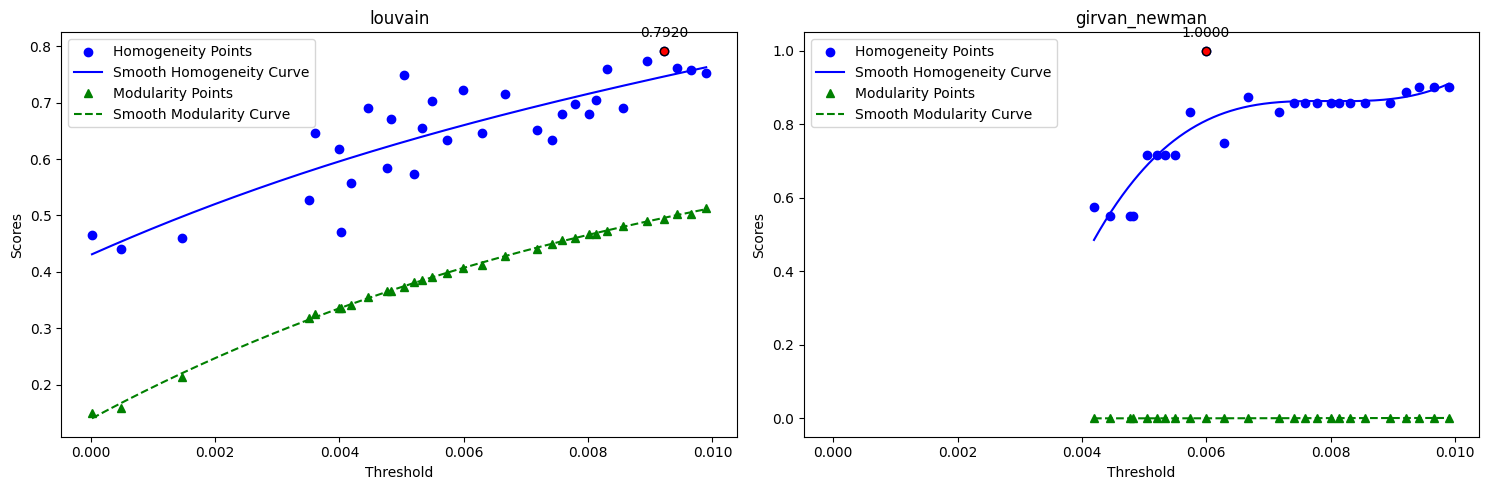

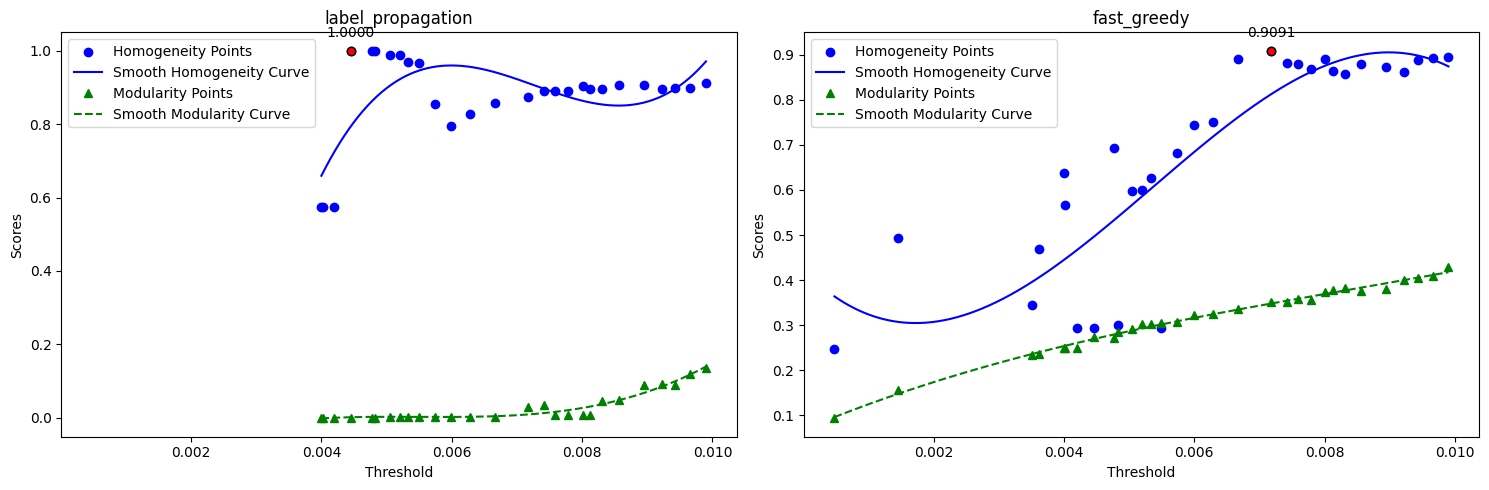

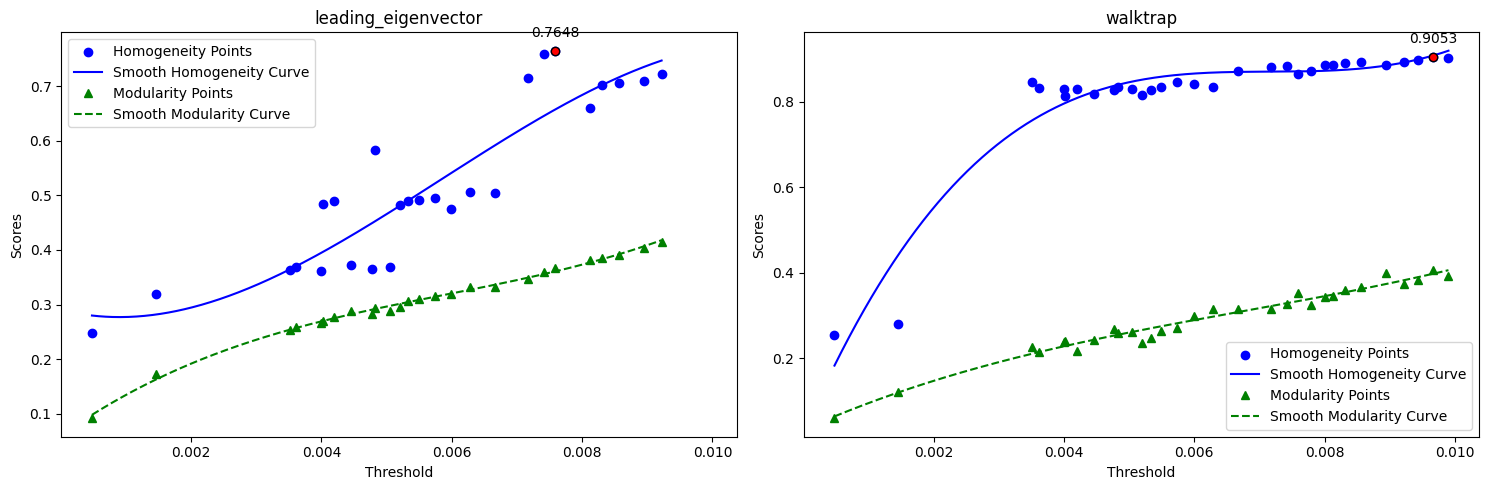

In [20]:
def plot(data, algorithms):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=False)
    # algo_names = list(data.keys())
    axes = axes.flatten()  # Flatten the array of axes for easier iteration

    for idx, algo in enumerate(algorithms):
        thresholds = np.array(list(data[algo].keys()))
        homogeneities = np.array(list(data[algo].values()))
        modularities = np.array([modularity_scores[algo][threshold] for threshold in data[algo].keys()])

        # Sorting data for plotting
        sorted_indices = np.argsort(thresholds)
        thresholds = thresholds[sorted_indices]
        homogeneities = homogeneities[sorted_indices]
        modularities = modularities[sorted_indices]

        # Fit a smooth line for homogeneity
        z_homogeneity = np.polyfit(thresholds, homogeneities, 3)  # Cubic polynomial
        p_homogeneity = np.poly1d(z_homogeneity)
        
        # Generate a smooth range of thresholds for smoother curve
        smooth_thresholds = np.linspace(thresholds.min(), thresholds.max(), 500)
        smooth_homogeneities = p_homogeneity(smooth_thresholds)

        # Fit a smooth line for modularity
        z_modularity = np.polyfit(thresholds, modularities, 3)  # Cubic polynomial
        p_modularity = np.poly1d(z_modularity)
        smooth_modularities = p_modularity(smooth_thresholds)

        # Plotting each algorithm's homogeneity data
        axes[idx].scatter(thresholds, homogeneities, color='blue', label='Homogeneity Points')
        axes[idx].plot(smooth_thresholds, smooth_homogeneities, 'b-', label='Smooth Homogeneity Curve')

        # Plotting each algorithm's modularity data
        axes[idx].plot(thresholds, modularities, 'g^', label='Modularity Points')
        axes[idx].plot(smooth_thresholds, smooth_modularities, 'g--', label='Smooth Modularity Curve')

        max_homogeneity = max(homogeneities)
        max_index = np.argmax(homogeneities)
        max_threshold = thresholds[max_index]
        axes[idx].scatter(max_threshold, max_homogeneity, color='red', edgecolor='black', zorder=5)  # Higher zorder to draw on top
        axes[idx].annotate(f'{max_homogeneity:.4f}', (max_threshold, max_homogeneity),
                           textcoords="offset points", xytext=(0,10), ha='center')

        axes[idx].set_title(algo)
        axes[idx].set_xlabel('Threshold')
        axes[idx].set_ylabel('Scores')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

plot(mean_homogeneity_scores, algorithms=["louvain", "girvan_newman"])
plot(mean_homogeneity_scores, algorithms=["label_propagation", "fast_greedy"])
plot(mean_homogeneity_scores, algorithms=["leading_eigenvector", "walktrap"])

In [32]:
# find the highest mean homogeneity score for each algorithm and the corresponding threshold and modularity
for algorithm in community_detection_algorithms:
    max_mean_homogeneity = max(mean_homogeneity_scores[algorithm].values())
    threshold = [k for k, v in mean_homogeneity_scores[algorithm].items() if v == max_mean_homogeneity][0]
    modularity = modularity_scores[algorithm][threshold]
    print(f"Algorithm: {algorithm}, Threshold: {threshold}, Modularity: {modularity}, Mean Homogeneity: {max_mean_homogeneity}")

Algorithm: louvain, Threshold: 0.009219219219219218, Modularity: 0.4935, Mean Homogeneity: 0.792
Algorithm: girvan_newman, Threshold: 0.005995995995995996, Modularity: 0.0002, Mean Homogeneity: 1.0
Algorithm: label_propagation, Threshold: 0.004824824824824825, Modularity: 0.0006, Mean Homogeneity: 1.0
Algorithm: fast_greedy, Threshold: 0.007177177177177177, Modularity: 0.3506, Mean Homogeneity: 0.9091
Algorithm: leading_eigenvector, Threshold: 0.007587587587587588, Modularity: 0.3669, Mean Homogeneity: 0.7648
Algorithm: walktrap, Threshold: 0.00965965965965966, Modularity: 0.406, Mean Homogeneity: 0.9053


In [14]:
# save all graphs in l2_graphs folder
for threshold, graph in graphs.items():
    nx.write_graphml(graph, f'../l2_graphs/{threshold}.graphml')